In [1]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

In [2]:
class Diffusion_debug_test(spatialpy.Model):

    def __init__(self, model_name="diffusion_debug_test"):
        spatialpy.Model.__init__(self, model_name)

        D_const = 0.005

        A = spatialpy.Species(name="A", diffusion_coefficient=D_const)
        B = spatialpy.Species(name="B", diffusion_coefficient=D_const)
        self.add_species([A, B])

        self.domain = spatialpy.Domain.create_2D_domain(
            xlim=[-1, 1], ylim=[-1, 1], nx=50, ny=50, type_id=1.0, 
            mass=1.0, nu=1.0, fixed=True,  rho0=1.0, c0=1.0, P0=1.0
        )

        self.add_initial_condition(spatialpy.PlaceInitialCondition(A, 10000, [0,0,0]))

        self.timespan([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],timestep_size=0.1)

In [3]:
model = Diffusion_debug_test()

In [4]:
from spatialpy import Solver
import filecmp
sol = Solver(model, debug_level=0)
sol.compile()
result = sol.run()

In [5]:
%time result2 = sol.run()

CPU times: user 3.13 ms, sys: 298 µs, total: 3.42 ms
Wall time: 1.76 s


In [6]:
filecmp.cmpfiles.__defaults__ = (False,)
dircmp = filecmp.dircmp(result.result_dir, result2.result_dir)
print(dircmp.report_full_closure())
print(dircmp.diff_files)
print(dircmp.left_only)
print(dircmp.right_only)
print(result == result2)

diff /tmp/spatialpy_result_z4ckihqp /tmp/spatialpy_result_lyx7us_z
Identical files : ['output0.vtk', 'output0_boundingBox.vtk']
Differing files : ['output10.vtk', 'output15.vtk', 'output20.vtk', 'output25.vtk', 'output30.vtk', 'output35.vtk', 'output40.vtk', 'output45.vtk', 'output5.vtk', 'output50.vtk']
None
['output10.vtk', 'output15.vtk', 'output20.vtk', 'output25.vtk', 'output30.vtk', 'output35.vtk', 'output40.vtk', 'output45.vtk', 'output5.vtk', 'output50.vtk']
[]
[]
False


read_step(0) opening '/tmp/spatialpy_result_z4ckihqp/output0.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output0.vtk)
read_step(1) opening '/tmp/spatialpy_result_z4ckihqp/output5.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output5.vtk)
read_step(2) opening '/tmp/spatialpy_result_z4ckihqp/output10.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output10.vtk)
read_step(3) opening '/tmp/spatialpy_result_z4ckihqp/output15.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output15.vtk)
read_step(4) opening '/tmp/spatialpy_result_z4ckihqp/output20.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output20.vtk)
read_step(5) opening '/tmp/spatialpy_result_z4ckihqp/output25.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output25.vtk)
read_step(6) opening '/tmp/spatialpy_result_z4ckihqp/output30.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output30.vtk)
read_step(7) opening '/tmp/spatialpy_result_z4ckihqp/output35.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output35.vtk)
read_step(8) opening '/tmp/spatialpy_result_z4ckihqp/output40.vtk'
o

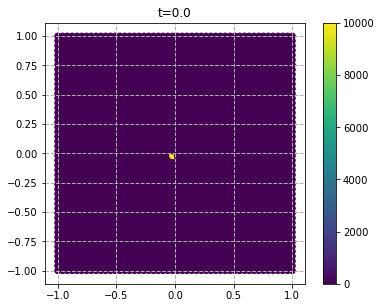

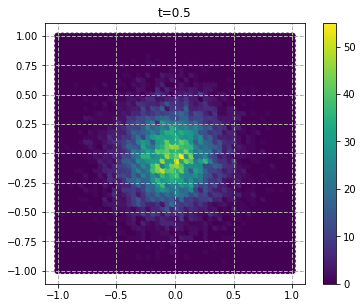

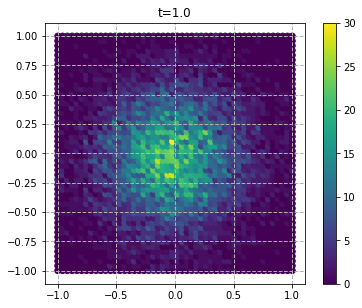

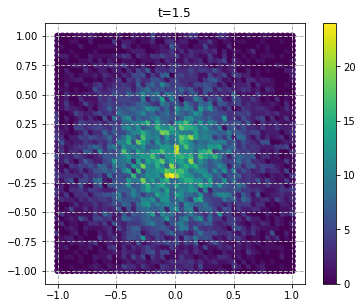

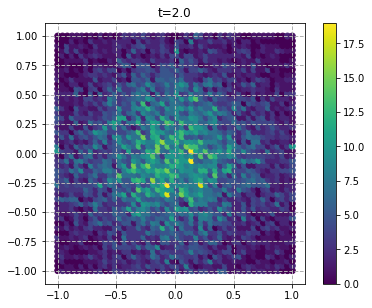

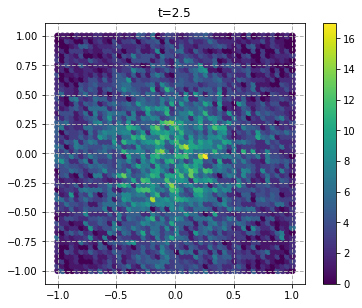

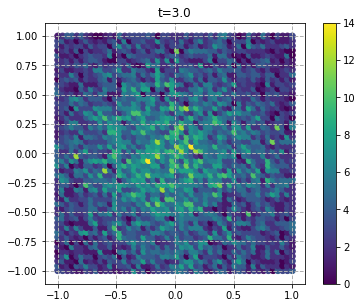

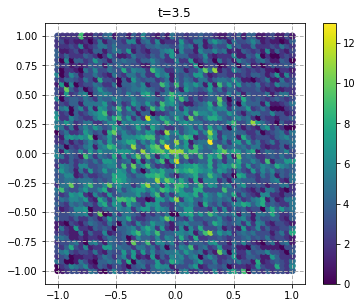

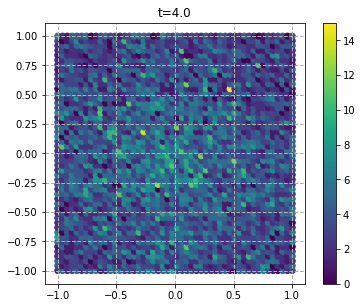

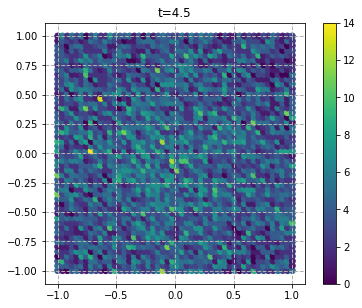

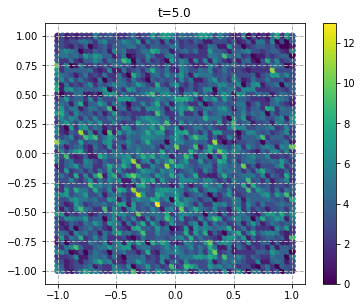

In [7]:
for i,t in enumerate(result.get_timespan()):
    result.plot_species("A", i, use_matplotlib=True, debug=True)
    plt.title(f"t={t}")

In [8]:
import numpy as np

In [9]:
def binit(x, y, y2=None):
    # sqrt(x^2+y^2)
    bins = sorted(list(set(x)))
    bin_values = np.zeros(50)
    if y2 is not None:
        y = np.sqrt(y**2+y2**2)
    for i, v in enumerate(y):
        for j, b in enumerate(bins):
            if x[i] == b:
    #             print('found ', b, ' at index ', i)
                bin_values[j] += v
    return bins, bin_values

In [10]:
numpy.linspace(0,len(result.get_timespan()),num=len(result.get_timespan())+1)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

read_step(1) opening '/tmp/spatialpy_result_z4ckihqp/output5.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output5.vtk)
read_step(1) opening '/tmp/spatialpy_result_z4ckihqp/output5.vtk'
open(/tmp/spatialpy_result_z4ckihqp/output5.vtk)
2500
[0. 0. 0. ... 0. 0. 0.]
2500
[0. 0. 0. ... 0. 0. 0.]


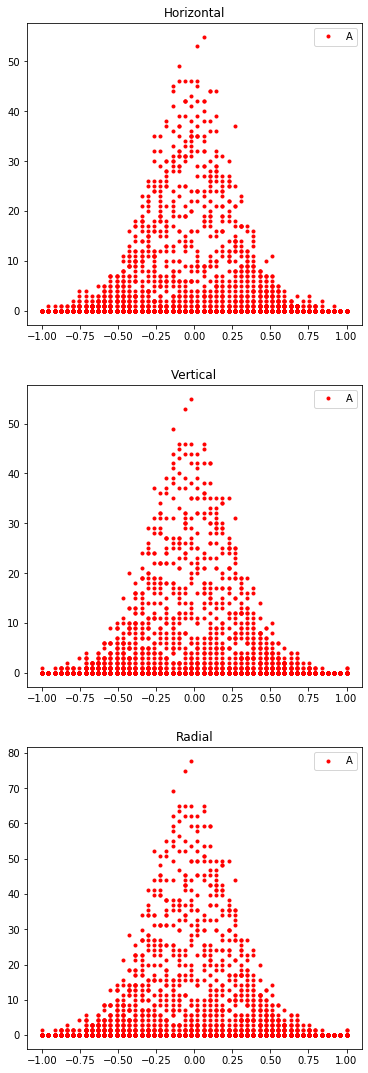

In [11]:

hx_vals = model.domain.coordinates()[:, 0]
hA_vals = result.get_species("A", timepoints=1, concentration=False, debug=True)
vx_vals = model.domain.coordinates()[:, 1]
vA_vals = result.get_species("A", timepoints=1, concentration=False, debug=True)
print(len(hA_vals))
print(hA_vals)
print(len(vA_vals))
print(vA_vals)

plt.figure(figsize=(6,6))
plt.subplots_adjust(top=2.5)
plt.subplot(3,1,1)
plt.title('Horizontal')

plt.plot(hx_vals,hA_vals,'.r', 
#         (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (1 - mu)**2 / (2 * sigma**2) )), '.g'
        )
plt.legend(['A'],loc='best')

plt.subplot(3,1,2)
plt.title('Vertical')

plt.plot(vx_vals,vA_vals,'.r')
plt.legend(['A'],loc='best')

plt.subplot(3,1,3)
plt.title('Radial')

plt.plot(vx_vals, np.sqrt(vA_vals**2+hA_vals**2), '.r')
plt.legend(['A'],loc='best')

In [12]:
dist_and_count = dict(zip(hx_vals, hA_vals))
print(len(hx_vals))
print(len(hA_vals))

2500
2500


In [13]:
hbins, hbin_values = binit(hx_vals, hA_vals)
vbins, vbin_values = binit(vx_vals, vA_vals)
rbins, rbin_values = binit(hx_vals, hA_vals, vA_vals)

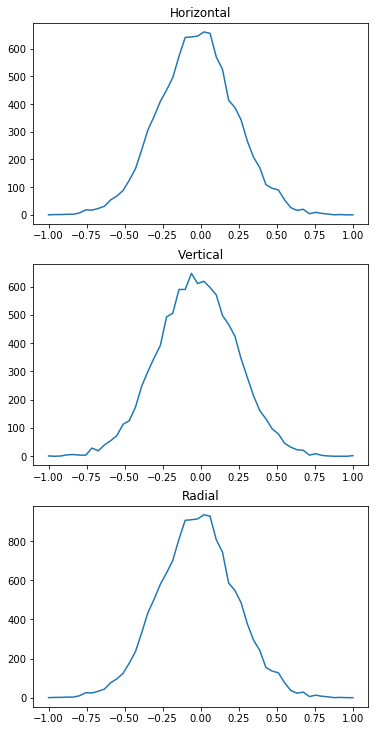

In [14]:
plt.subplot(3, 1, 1)
plt.title('Horizontal')
plt.plot(hbins, hbin_values)
plt.subplot(3, 1, 2)
plt.title('Vertical')
plt.plot(vbins, vbin_values)
plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 3)
plt.title('Radial')
plt.plot(rbins, rbin_values)

In [15]:
def countit(x, y, y2=None):
    counts = []
    if y2 is not None:
        y = np.sqrt(y**2+y2**2)
    for i in range(len(x)):
        j = 0
        while j < y[i]:
            counts.append(hx_vals[i])
            j += 1
    return counts

(array([  2.,   0.,   2.,   0.,   4.,   0.,   4.,   0.,  13.,   0.,  31.,
          0.,   0.,  29.,   0.,  43.,   0.,  52.,   0.,  88.,   0., 107.,
          0., 136.,   0.,   0., 194.,   0., 250.,   0., 349.,   0., 450.,
          0., 521.,   0., 593.,   0.,   0., 656.,   0., 719.,   0., 829.,
          0., 928.,   0., 926.,   0.,   0., 930.,   0., 953.,   0., 947.,
          0., 825.,   0., 762.,   0., 600.,   0.,   0., 566.,   0., 502.,
          0., 393.,   0., 310.,   0., 254.,   0., 170.,   0.,   0., 150.,
          0., 140.,   0.,  88.,   0.,  45.,   0.,  29.,   0.,  39.,   0.,
          0.,   7.,   0.,  16.,   0.,  10.,   0.,   5.,   0.,   0.,   0.,
          2.]),
 array([-0.95918367, -0.94040816, -0.92163265, -0.90285714, -0.88408163,
        -0.86530612, -0.84653061, -0.8277551 , -0.80897959, -0.79020408,
        -0.77142857, -0.75265306, -0.73387755, -0.71510204, -0.69632653,
        -0.67755102, -0.65877551, -0.64      , -0.62122449, -0.60244898,
        -0.58367347, -0.56

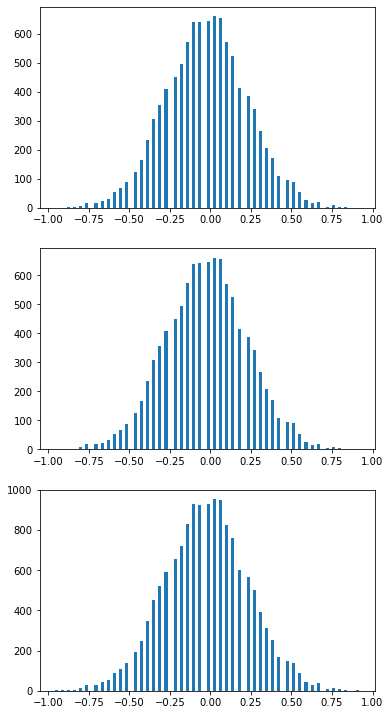

In [16]:
hcounts = countit(hx_vals, hA_vals)
vcounts = countit(vx_vals, vA_vals)
rcounts = countit(hx_vals, hA_vals, vA_vals)

plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 1)
plt.hist(hcounts, bins=100)
plt.subplot(3, 1, 2)
plt.hist(vcounts, bins=100)
plt.subplot(3, 1, 3)
plt.hist(rcounts, bins=100)